<a href="https://colab.research.google.com/github/shubhamgogri/Python--DS/blob/main/EDA/EBill/E_bill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data = pd.read_excel('ebill.xlsx')
data

,Consumption,Energy Charge,Fixed Charge,Bill Amount,Month
0,220,905.00,290.00,2000,July
1,215,885.00,280.33,1775,August
2,220,905.00,290.00,1810,September
3,238,995.00,289.66,1960,October
4,198,800.85,280.00,1640,November
5,168,623.55,310.00,1410,December
6,175,680.00,280.00,1450,January
7,183,720.00,280.00,1510,February
8,161,610.00,280.00,1347,March
9,228,933.30,298.06,1870,April


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Consumption    12 non-null     int64  
 1   Energy Charge  12 non-null     float64
 2   Fixed Charge   12 non-null     float64
 3   Bill Amount    12 non-null     int64  
 4   Month          12 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 608.0+ bytes


All the features are numerical along with an categorical Feature i.e. Month

In [92]:
data.corr()

,Consumption,Energy Charge,Fixed Charge,Bill Amount
Consumption,1.000000,0.998612,0.183973,0.792041
Energy Charge,0.998612,1.000000,0.134296,0.796010
Fixed Charge,0.183973,0.134296,1.000000,0.094368
Bill Amount,0.792041,0.796010,0.094368,1.000000


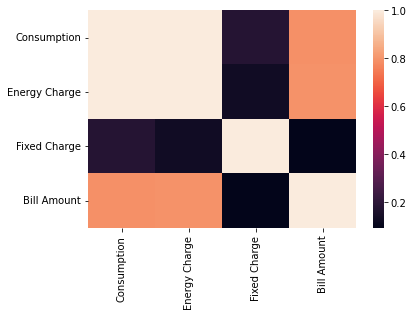

In [93]:
sns.heatmap(data.corr())

Fixed charge has no correlation with any other features, 

While Energy Charge and consumption are highly cor-related

Text(0.5, 1.0, 'Consumption vs Bill')

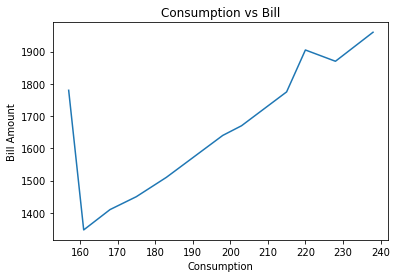

In [94]:
data.groupby('Consumption')['Bill Amount'].median().plot()
plt.xlabel('Consumption')
plt.ylabel('Bill Amount')
plt.title('Consumption vs Bill')


Converting the months into three seasons i.e. Rainy, Winter, Summer 

In [95]:
season = {'January' :'Winter', 'February': 'Summer',   'March' : 'Summer', 'April': 'Summer', 'May': 'Summer', 'June': 'Rainy', 'July':'Rainy', 'August': 'Rainy', 'September': 'Rainy', 'October': 'Winter', 'November':'Winter', 'December':'Winter'  }

In [96]:
data['Month'] = data['Month'].map(season)

In [97]:
data

,Consumption,Energy Charge,Fixed Charge,Bill Amount,Month
0,220,905.00,290.00,2000,Rainy
1,215,885.00,280.33,1775,Rainy
2,220,905.00,290.00,1810,Rainy
3,238,995.00,289.66,1960,Winter
4,198,800.85,280.00,1640,Winter
5,168,623.55,310.00,1410,Winter
6,175,680.00,280.00,1450,Winter
7,183,720.00,280.00,1510,Summer
8,161,610.00,280.00,1347,Summer
9,228,933.30,298.06,1870,Summer


COnverted the months acc to seasons. 

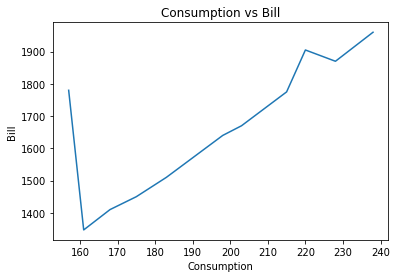

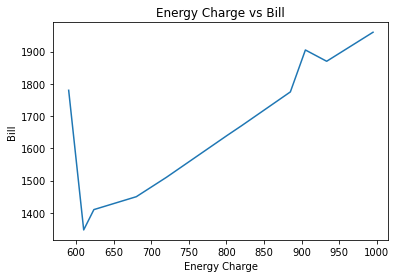

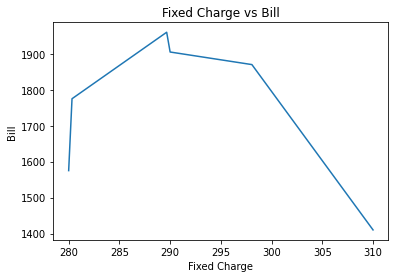

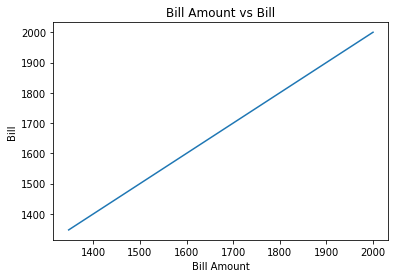

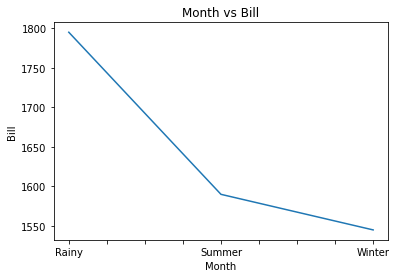

In [98]:
for feature in data.columns:
  data.groupby(feature)['Bill Amount'].median().plot()
  plt.xlabel(feature)
  plt.ylabel('Bill')
  plt.title(feature + ' vs Bill')
  plt.show()

In Rainy season - highest is the bill amount

Winter has the lowest while the summer is in between

as consumption increases the energy charge also increase since they are corelated


Text(0.5, 1.0, 'diff between the enery anf fixed charge affecting the bill')

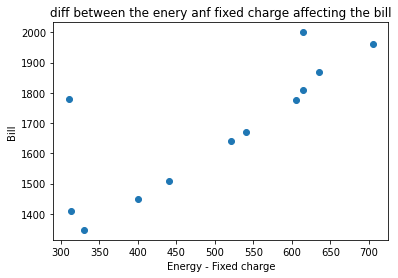

In [99]:
plt.scatter(data['Energy Charge'] - data['Fixed Charge'], data['Bill Amount'])
plt.xlabel('Energy - Fixed charge')
plt.ylabel('Bill')
plt.title('diff between the enery anf fixed charge affecting the bill')

Higher the diff - high is the bill
Directly proportionate

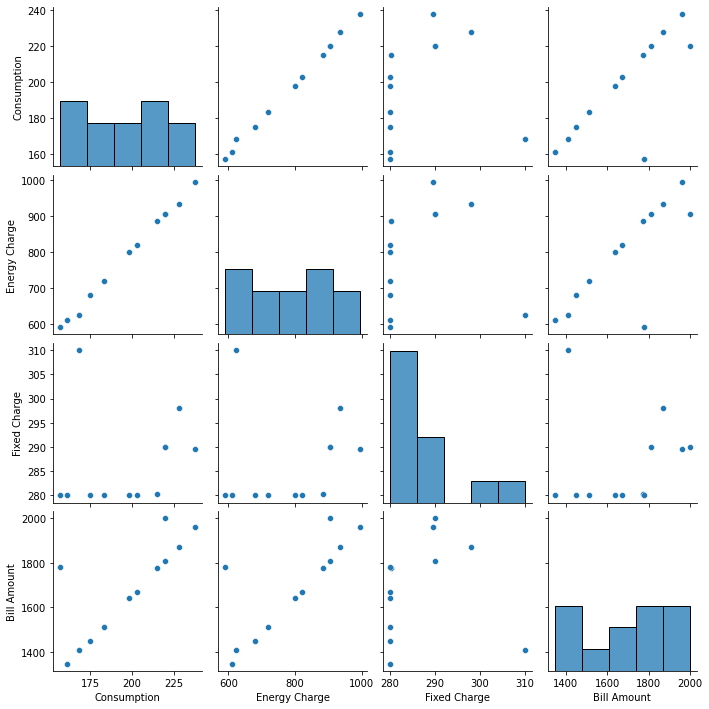

In [100]:
sns.pairplot(data)

nothing definative is shown here 

as we already knew that consumption and energy charge are correlated

In [101]:
descrete = [feature for feature in data.columns if(len(data[feature].unique())<13) and feature not in ['Month']]
descrete

['Consumption', 'Energy Charge', 'Fixed Charge', 'Bill Amount']

All the features are descrete

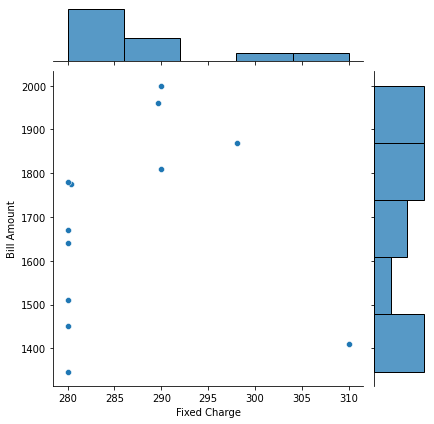

In [102]:
sns.jointplot(x = 'Fixed Charge', y = 'Bill Amount', data = data)

If bill amount is less than 1800 then Fixd charge is around 280.

else it is around 290 - 300


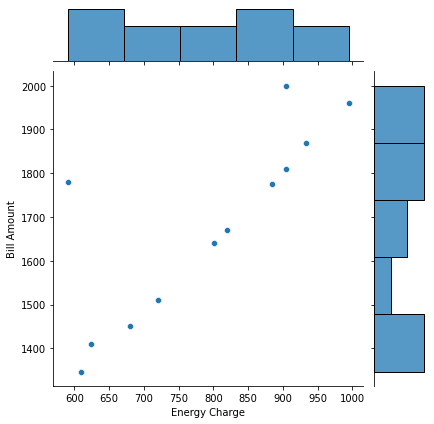

In [103]:
sns.jointplot(x = 'Energy Charge', y = 'Bill Amount', data = data)

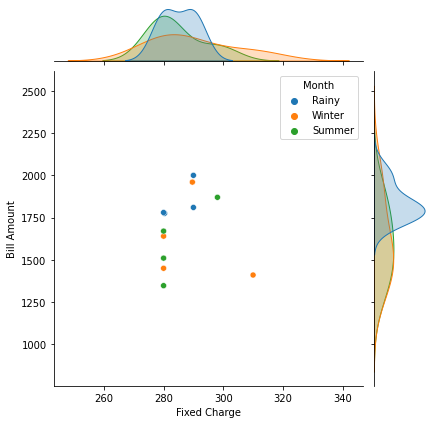

In [104]:
sns.jointplot(x = 'Fixed Charge', y = 'Bill Amount', data = data, hue = 'Month')

bills are higher in rainy season

In [105]:
# It looks like a regression problem 

Handle the season feature

In [114]:
data['Month'] = data['Month'].map({'Summer':1, 'Winter':2, 'Rainy': 3})
data


,Consumption,Energy Charge,Fixed Charge,Bill Amount,Month
0,220,905.00,290.00,2000,3
1,215,885.00,280.33,1775,3
2,220,905.00,290.00,1810,3
3,238,995.00,289.66,1960,2
4,198,800.85,280.00,1640,2
5,168,623.55,310.00,1410,2
6,175,680.00,280.00,1450,2
7,183,720.00,280.00,1510,1
8,161,610.00,280.00,1347,1
9,228,933.30,298.06,1870,1


In [115]:
y = data['Bill Amount']
y

0     2000
1     1775
2     1810
3     1960
4     1640
5     1410
6     1450
7     1510
8     1347
9     1870
10    1670
11    1780
Name: Bill Amount, dtype: int64

In [116]:
data.drop('Bill Amount', axis = 1, inplace = True)

In [117]:
data

,Consumption,Energy Charge,Fixed Charge,Month
0,220,905.00,290.00,3
1,215,885.00,280.33,3
2,220,905.00,290.00,3
3,238,995.00,289.66,2
4,198,800.85,280.00,2
5,168,623.55,310.00,2
6,175,680.00,280.00,2
7,183,720.00,280.00,1
8,161,610.00,280.00,1
9,228,933.30,298.06,1


In [118]:
from sklearn.linear_model import LinearRegression

model =LinearRegression()
model.fit(data, y)

LinearRegression()

In [127]:
model.predict([[189, 750 , 290, 3]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1647.25338263])